## Business Understanding

In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline

## Data Understanding

There are three different files that I've been using in this data analysis project.
- Calendar
- Reviews
- Listings

Calendar data set has 4 columns with listing_id, date, avaiablity and price.
only price column has null values and there are no missing values in listing_id,date and avaiable columns.

In [342]:
# read Calendar Data
df_calendar=pd.read_csv('calendar.csv')

In [343]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [344]:
df_calendar.shape

(1393570, 4)

In [345]:
df_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [346]:
df_calendar.describe(include='all')

,listing_id,date,available,price
count,1.393570e+06,1393570,1393570,934542
unique,NaN,365,2,669
top,NaN,2016-10-28,t,$150.00
freq,NaN,3818,934542,36646
mean,5.550111e+06,NaN,NaN,NaN
std,2.962274e+06,NaN,NaN,NaN
min,3.335000e+03,NaN,NaN,NaN
25%,3.258213e+06,NaN,NaN,NaN
50%,6.118244e+06,NaN,NaN,NaN
75%,8.035212e+06,NaN,NaN,NaN


we can see only price column in missing data.

listing dataset is including all the information regarding the place that they are renting such as neighborhood, and average review scores.there are 3818 rows and 92 columns in this dataset.

In [347]:
#read Listings dataset
df_listings=pd.read_csv('listings.csv')

In [348]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [349]:
df_listings.shape

(3818, 92)

In [350]:
df_listings.describe(include='all')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3818,3.818000e+03,3818,3818,3641,3249,3818,3818,2786,...,3162.000000,3818,0.0,3818,3818,3818,3818,3818,3818.000000,3191.000000
unique,NaN,3818,NaN,1,3792,3478,3119,3742,1,2506,...,NaN,1,NaN,1,2,3,2,2,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/2187563,NaN,2016-01-04,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,none,Wallingford is a mostly-residential neighborho...,...,NaN,f,NaN,WASHINGTON,f,strict,f,f,NaN,NaN
freq,NaN,1,NaN,3818,3,15,14,10,3818,17,...,NaN,3818,NaN,3818,3227,1417,3497,3443,NaN,NaN
mean,5.550111e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.452245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.946307,2.078919
std,2.962660e+06,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.750259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.893029,1.822348
min,3.335000e+03,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.020000
25%,3.258256e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.695000
50%,6.118244e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.540000
75%,8.035127e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,3.000000


Text(0.5, 1.0, 'cancellation policy')

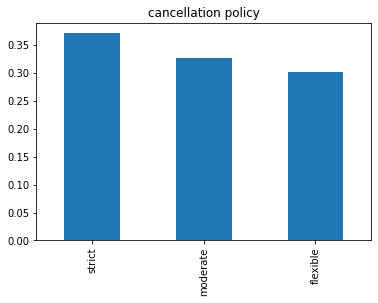

In [351]:
df=df_listings.cancellation_policy.value_counts()
#df/df_listings.shape[0].plot(kind='bar')
(df/df_listings.shape[0]).plot(kind="bar")
plt.title("cancellation policy")

we can see that 35% of the housings are having strict cancellation policy and around 30% with felixble policy.

In [352]:
df_listings.shape

(3818, 92)

Text(0.5, 1.0, 'Host Response Time')

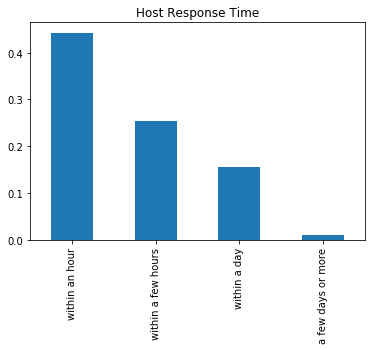

In [353]:
response_time=df_listings['host_response_time'].value_counts()
(response_time/df_listings.shape[0]).plot(kind='bar')
plt.title("Host Response Time")

based on the bar graph we can see around 40% of hosts response time is with an hour and only a few of them resonse in a few days
or more

Text(0.5, 1.0, 'Host Neighbourhoods Grouped')

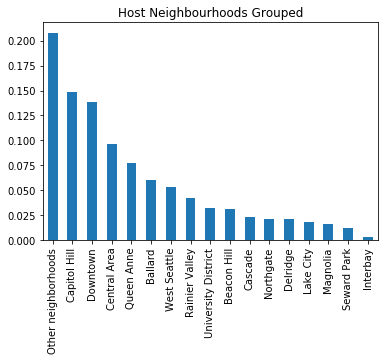

In [354]:
neighborhood=df_listings['neighbourhood_group_cleansed'].value_counts()
(neighborhood/df_listings.shape[0]).plot(kind="bar")
plt.title("Host Neighbourhoods Grouped")

we can see that most of the places that are renting are in capital hill, downtoan and central area.and out of this places majority of these renting spots are houses and apartments.

Text(0.5, 1.0, 'property types')

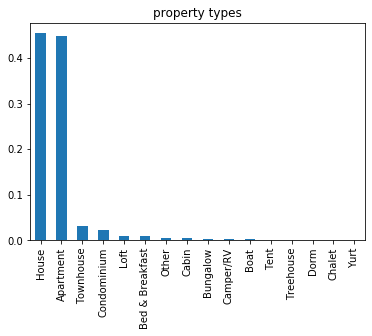

In [355]:
property_type=df_listings['property_type'].value_counts()
(property_type/df_listings.shape[0]).plot(kind='bar')
plt.title('property types')

In [356]:
df_listings.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [357]:
df_listings.describe(include='all')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3818,3.818000e+03,3818,3818,3641,3249,3818,3818,2786,...,3162.000000,3818,0.0,3818,3818,3818,3818,3818,3818.000000,3191.000000
unique,NaN,3818,NaN,1,3792,3478,3119,3742,1,2506,...,NaN,1,NaN,1,2,3,2,2,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/2187563,NaN,2016-01-04,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,none,Wallingford is a mostly-residential neighborho...,...,NaN,f,NaN,WASHINGTON,f,strict,f,f,NaN,NaN
freq,NaN,1,NaN,3818,3,15,14,10,3818,17,...,NaN,3818,NaN,3818,3227,1417,3497,3443,NaN,NaN
mean,5.550111e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.452245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.946307,2.078919
std,2.962660e+06,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.750259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.893029,1.822348
min,3.335000e+03,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.020000
25%,3.258256e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.695000
50%,6.118244e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.540000
75%,8.035127e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,3.000000


review dataset is including reviwer_id and their comments regarding to each listing.there are 84849 rows and 6 columns in this dataset.

In [358]:
df_reviews=pd.read_csv('reviews.csv')

In [359]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [360]:
df_reviews.shape

(84849, 6)

# 3. Data Analysis

 1.How does prices vary in different months of the year?<br>
 2.How does prices are different with cancellation policy?<br>
 3.How does prices varies with neighborhoods?<br>
 4.Find neghborhoods with the best reviews


In [361]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [362]:
df_calendar['price'].dtype

dtype('O')

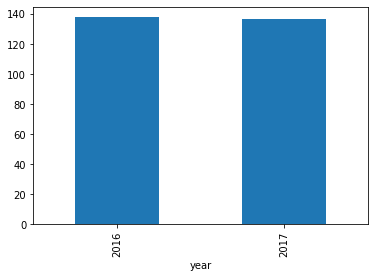

In [363]:
# we need to remove the $ sign from the price 
df_calendar['year']=pd.DatetimeIndex(df_calendar['date']).year
df_calendar['month']=pd.DatetimeIndex(df_calendar['date']).month
df_calendar['price']=df_calendar['price'].replace('[\$,]','',regex=True).astype(float)
df_calendar.groupby('year')['price'].mean().plot(kind="bar")

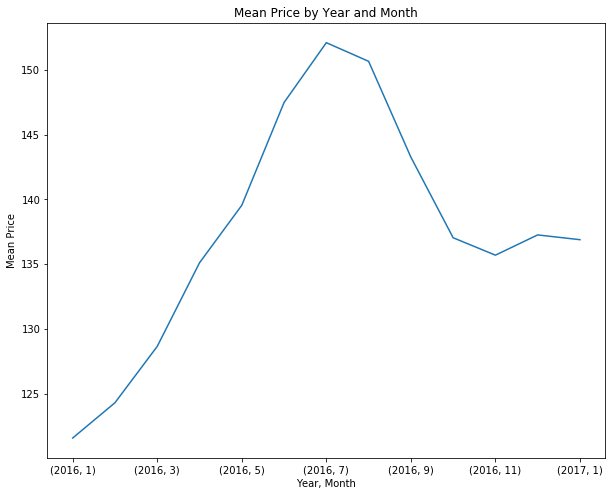

In [364]:
# Group by 'year' and 'month', calculate the mean price, then plot
df_calendar.groupby(['year', 'month'])['price'].mean().plot(figsize=(10, 8))
plt.title('Mean Price by Year and Month')
plt.xlabel('Year, Month')
plt.ylabel('Mean Price')
plt.show()

we can see that we have a spike in June to August 2016 and the highest month is July 2016.

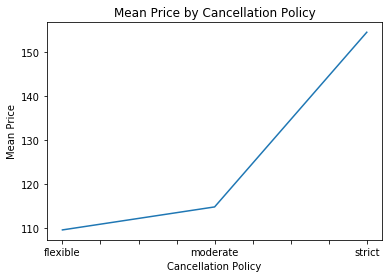

In [365]:
# Remove commas and dollar signs, convert to float
df_listings['price'] = df_listings['price'].replace('[\$,]', '', regex=True).astype(float)

# Group by 'cancellation_policy' and calculate the mean price, then plot
df_listings.groupby('cancellation_policy')['price'].mean().plot()
plt.title('Mean Price by Cancellation Policy')
plt.xlabel('Cancellation Policy')
plt.ylabel('Mean Price')
plt.show()

those places that are havin strict cancellation policy are having higher price as well.

In [366]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [367]:
df_listings['price']=df_listings['price'].replace('[\$,]','',regex=True).astype(float)
print(df_listings.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False))

neighbourhood_cleansed
Southeast Magnolia    231.705882
Portage Bay           227.857143
Westlake              194.470588
West Queen Anne       187.769231
Montlake              182.789474
                         ...    
North Delridge         76.375000
Georgetown             76.125000
South Delridge         74.666667
Olympic Hills          71.687500
Rainier Beach          68.555556
Name: price, Length: 87, dtype: float64


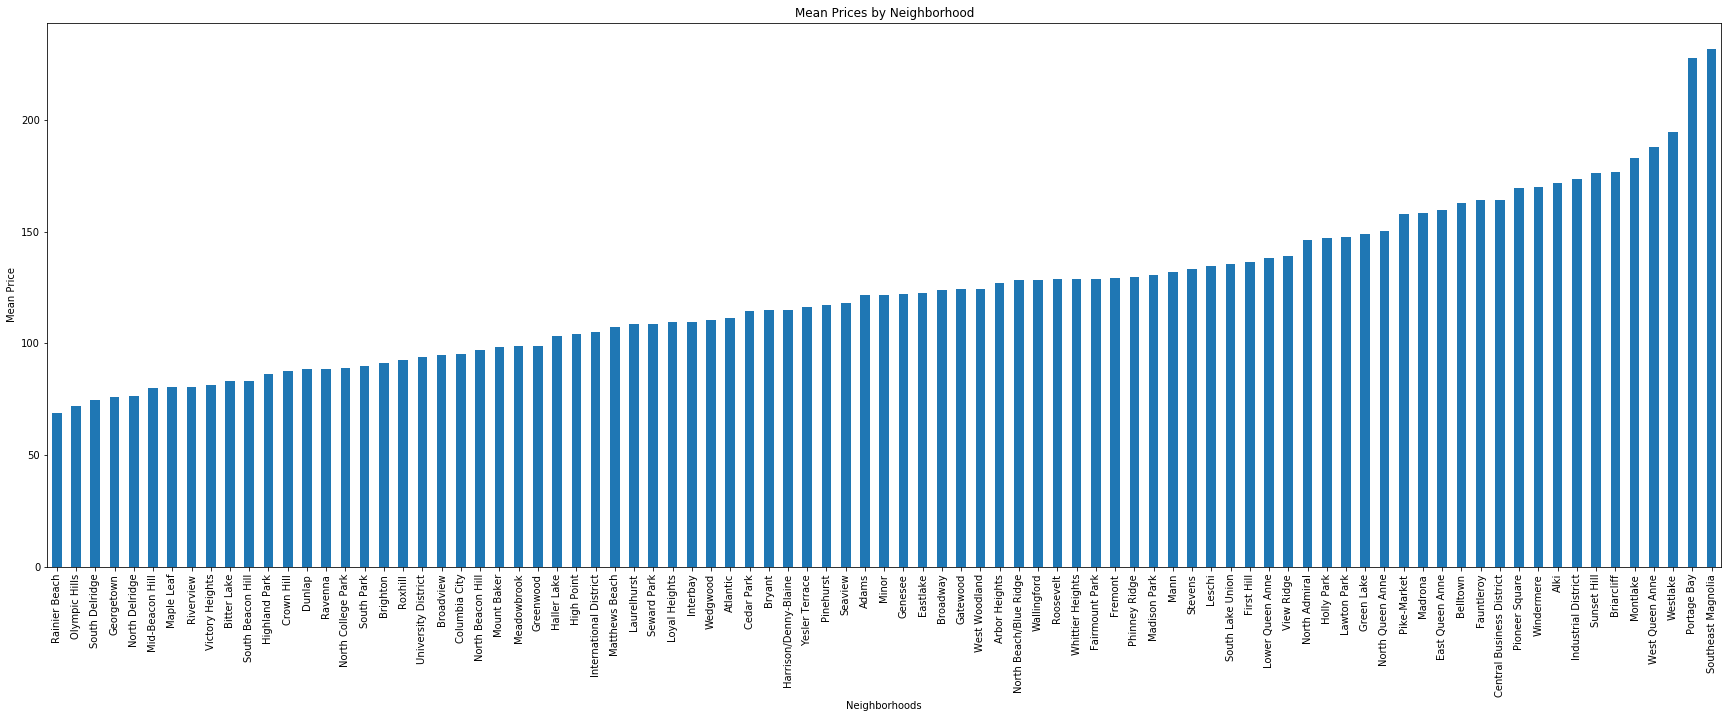

In [368]:
# Group by neighbourhood_cleansed, calculate the mean price, and sort in ascending order
df_neighbourhood = df_listings.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)

# Plotting the mean prices for each neighborhood
df_neighbourhood.plot(kind='bar', figsize=(30, 10))
plt.title('Mean Prices by Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Mean Price')
plt.show()

In [369]:
df_listings.groupby('neighbourhood_cleansed')
df_listings['neighbourhood_cleansed']

0       West Queen Anne
1       West Queen Anne
2       West Queen Anne
3       West Queen Anne
4       West Queen Anne
             ...       
3813            Fremont
3814        Portage Bay
3815      Rainier Beach
3816       Madison Park
3817    East Queen Anne
Name: neighbourhood_cleansed, Length: 3818, dtype: object

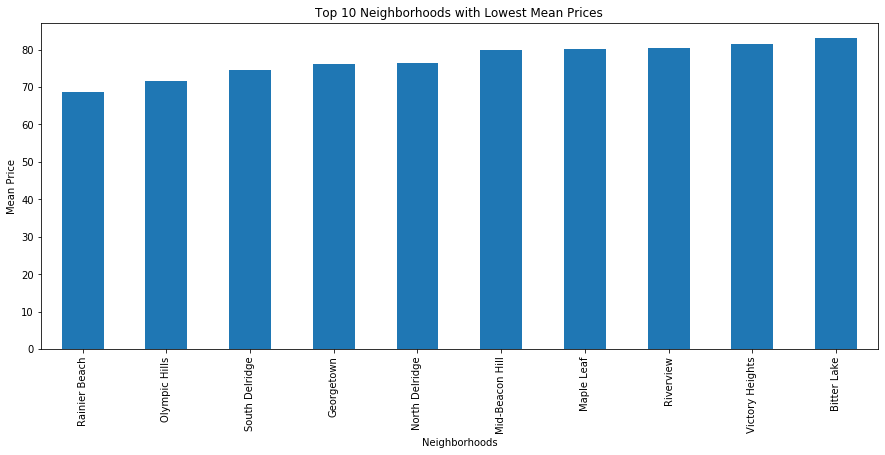

In [370]:
df_neighbourhood = df_listings.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)

# Select the top 10 neighborhoods with the lowest mean prices
top_10_neighbourhoods = df_neighbourhood.head(10)

# Plotting the mean prices for the top 10 neighborhoods
top_10_neighbourhoods.plot(kind='bar', figsize=(15, 6))
plt.title('Top 10 Neighborhoods with Lowest Mean Prices')
plt.xlabel('Neighborhoods')
plt.ylabel('Mean Price')
plt.show()

In [371]:
def give_neighbourhood(listing_id):
    neighbourhood = df_listings.at[df_listings[df_listings['id'] == listing_id].index[0], 'neighbourhood_cleansed']
    return neighbourhood


'''
 the function allows you to input a listing ID and retrieves the corresponding neighborhood information from the DataFrame df_listings. This can be useful for various analytical tasks or data processing workflows where neighborhood information is required based on listing IDs.
'''
#test the function
give_neighbourhood(7202016)

'Lower Queen Anne'

# Data Preparation
Price Prediction

In [372]:
df_listings.describe(include='all')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3818,3.818000e+03,3818,3818,3641,3249,3818,3818,2786,...,3162.000000,3818,0.0,3818,3818,3818,3818,3818,3818.000000,3191.000000
unique,NaN,3818,NaN,1,3792,3478,3119,3742,1,2506,...,NaN,1,NaN,1,2,3,2,2,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/2187563,NaN,2016-01-04,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,none,Wallingford is a mostly-residential neighborho...,...,NaN,f,NaN,WASHINGTON,f,strict,f,f,NaN,NaN
freq,NaN,1,NaN,3818,3,15,14,10,3818,17,...,NaN,3818,NaN,3818,3227,1417,3497,3443,NaN,NaN
mean,5.550111e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.452245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.946307,2.078919
std,2.962660e+06,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.750259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.893029,1.822348
min,3.335000e+03,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.020000
25%,3.258256e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.695000
50%,6.118244e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.540000
75%,8.035127e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,3.000000


In [373]:
df_listings['price'].isnull().sum()

0

In [374]:
df_listings.shape

(3818, 92)

In [375]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [376]:
df_listing_2=df_listings.copy()
low_impact_columns=['id','listing_url','scrape_id','last_scraped','thumbnail_url'
                    ,'medium_url','xl_picture_url','host_id','host_url','host_thumbnail_url'
                    ,'host_verifications','street','neighbourhood','neighbourhood_group_cleansed'
                    ,'zipcode','smart_location','country','latitude','longitude','weekly_price',
                    'monthly_price','calendar_updated','calendar_last_scraped','first_review',
                    'last_review','calculated_host_listings_count','reviews_per_month']

df_listing_2=df_listing_2.drop(low_impact_columns,axis=1)

In [377]:
df_listing_2.shape

(3818, 65)

In [378]:
# find a column with all missing values
df_listing_2.columns[df_listing_2.isnull().all()].tolist()

['license']

In [379]:
df_listing_2=df_listing_2.drop('license', axis=1)

In [380]:
num_col=df_listing_2.select_dtypes(include=['int','float']).columns
num_col

Index(['host_listings_count', 'host_total_listings_count', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'],
      dtype='object')

In [381]:
#identifying the count of null values for each column specified in the columns list 
for columns in num_col:
    print(columns,df_listing_2[columns].isnull().sum())

host_listings_count 2
host_total_listings_count 2
accommodates 0
bathrooms 16
bedrooms 6
beds 1
square_feet 3721
price 0
guests_included 0
minimum_nights 0
maximum_nights 0
availability_30 0
availability_60 0
availability_90 0
availability_365 0
number_of_reviews 0
review_scores_rating 647
review_scores_accuracy 658
review_scores_cleanliness 653
review_scores_checkin 658
review_scores_communication 651
review_scores_location 655
review_scores_value 656


host_listings_count and host_total_listings_count we replace null value with 1 <br>
bathrooms: are having 16 null values that we have replace it with zero <br>
bedrooms: are having 6 null values that we can replace it with 1 because only we can see values for beds in the data <br>
beds: only one record is showing null that we can replace it with 1<br>
square_feet: we can drop the column since 3721 rows are not having values<br>
for all review related columns with replace null values with 0<br>


In [382]:
#  set host_listings_count and host_total_listings_count we replace null value with 1
df_listing_2['host_listings_count']= df_listing_2['host_listings_count'].fillna(1)
df_listing_2['host_total_listings_count']= df_listing_2['host_total_listings_count'].fillna(1)
# replace null value with 0
df_listing_2['bathrooms']=df_listing_2['bathrooms'].fillna(0)
# replace null value with 1
df_listing_2['bedrooms']=df_listing_2['bedrooms'].fillna(1)
# replace null value with 1
df_listing_2['beds']=df_listing_2['beds'].fillna(1)
# Drop square_feet
df_listing_2=df_listing_2.drop('square_feet',axis=1)
#for all review related columns with replace null values with 0
columns_fillna_0 = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]
for i in columns_fillna_0:
    df_listing_2[i]=df_listing_2[i].fillna(0)

    



In [383]:
num_col=df_listing_2.select_dtypes(include=['int','float']).columns
for i in num_col:
    print(i,df_listing_2[i].isnull().sum())

host_listings_count 0
host_total_listings_count 0
accommodates 0
bathrooms 0
bedrooms 0
beds 0
price 0
guests_included 0
minimum_nights 0
maximum_nights 0
availability_30 0
availability_60 0
availability_90 0
availability_365 0
number_of_reviews 0
review_scores_rating 0
review_scores_accuracy 0
review_scores_cleanliness 0
review_scores_checkin 0
review_scores_communication 0
review_scores_location 0
review_scores_value 0


In [384]:
#categorical variables
category_col=df_listing_2.select_dtypes(include=['object']).columns
for i in category_col:
 print(i,df_listing_2[i].isnull().sum())

name 0
summary 177
space 569
description 0
experiences_offered 0
neighborhood_overview 1032
notes 1606
transit 934
picture_url 0
host_name 2
host_since 2
host_location 8
host_about 859
host_response_time 523
host_response_rate 523
host_acceptance_rate 773
host_is_superhost 2
host_picture_url 2
host_neighbourhood 300
host_has_profile_pic 2
host_identity_verified 2
neighbourhood_cleansed 0
city 0
state 0
market 0
country_code 0
is_location_exact 0
property_type 1
room_type 0
bed_type 0
amenities 0
security_deposit 1952
cleaning_fee 1030
extra_people 0
has_availability 0
requires_license 0
jurisdiction_names 0
instant_bookable 0
cancellation_policy 0
require_guest_profile_picture 0
require_guest_phone_verification 0


In [385]:
# set all text variables to boolean
def set_boolean_text(textdata):
    '''
    Function to set all text variables to boolean
    INPUT:
    textdata -
    OUTPUT:
    Boolean 0 or 1 
    '''
    return 1 if textdata else 0

text_host_fields = ['summary', 'space', 'neighborhood_overview', 'notes', 'transit', 'name', 'description', 'picture_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_picture_url', 'host_neighbourhood']

for text in text_host_fields:
    df_listing_2[text] = df_listing_2[text].apply(set_boolean_text)

In [386]:
# set all t/f variables to boolean
def set_boolean_tf(tfdata):
    '''
    Function to set all boolean variables to true/false
    INPUT:
    't','f' data -
    OUTPUT:
    Boolean 0 or 1 
    '''
    return 1 if tfdata else 0

tf_col = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact',
              'has_availability','requires_license','instant_bookable','require_guest_profile_picture',
              'require_guest_phone_verification']

for i in tf_col:
    df_listing_2[i] = df_listing_2[i].apply(set_boolean_tf)

In [387]:
# Assign N/A to applicable host fields
host_fields_to_fillna = ['host_response_time', 'host_acceptance_rate']
for field in host_fields_to_fillna:
    df_listing_2[field].fillna('N/A', inplace=True)

# Process host_response_rate
#df_listing_2['host_response_rate'] = df_listing_2['host_response_rate'].str.replace('[\%,]', '', regex=True).astype(float).fillna(0)
df_listing_2['host_response_rate'] = df_listing_2['host_response_rate'].astype(str).str.replace('[\%,]', '', regex=True).astype(float).fillna(0)
# Drop records with empty value for property_type
df_listing_2.dropna(subset=['property_type'], inplace=True)

# Clean security_deposit, cleaning_fee, and extra_people
money_columns = ['security_deposit', 'cleaning_fee', 'extra_people']
for col in money_columns:
    df_listing_2[col] = df_listing_2[col].str.replace('[\$,]', '', regex=True).astype(float).fillna(0)

# Drop unnecessary columns
columns_to_drop = ['experiences_offered', 'market', 'jurisdiction_names']
df_listing_2.drop(columns_to_drop, axis=1, inplace=True)

# Clean up city and state names
df_listing_2['city'] = df_listing_2['city'].str.lower().str.strip()
df_listing_2['state'] = df_listing_2['state'].str.lower()

In [388]:
category_cols = df_listing_2.select_dtypes(include=['object']).columns
for col in category_cols:
        print(col,df_listing_2[col].isnull().sum())

host_response_time 0
host_acceptance_rate 0
neighbourhood_cleansed 0
city 0
state 0
country_code 0
property_type 0
room_type 0
bed_type 0
amenities 0
cancellation_policy 0


To handle the amenities column and create additional columns to represent each amenity as a boolean field, you can follow these steps:

Identify the most common amenities present within the listings.
Create additional columns for each amenity found, representing them as boolean fields.

In [389]:
# Handle amenities - Explore most common amenities
amenities = []
for index, row in df_listing_2.iterrows():
    row['amenities'] = row['amenities'].replace('{','')
    row['amenities'] = row['amenities'].replace('}','')
    row['amenities'] = row['amenities'].replace('"','')
    mylist = row['amenities'].split(',')
    for l in mylist:
        amenities.append(l)
    
amenities_count = Counter(amenities)
amenities_count.most_common()

[('Wireless Internet', 3666),
 ('Heating', 3626),
 ('Kitchen', 3422),
 ('Smoke Detector', 3280),
 ('Essentials', 3237),
 ('Dryer', 2996),
 ('Washer', 2991),
 ('Internet', 2811),
 ('Shampoo', 2670),
 ('TV', 2574),
 ('Carbon Monoxide Detector', 2485),
 ('Fire Extinguisher', 2196),
 ('Free Parking on Premises', 2166),
 ('Family/Kid Friendly', 1962),
 ('First Aid Kit', 1679),
 ('Cable TV', 1446),
 ('Indoor Fireplace', 885),
 ('Pets live on this property', 882),
 ('Hangers', 846),
 ('Elevator in Building', 785),
 ('Hair Dryer', 774),
 ('Laptop Friendly Workspace', 745),
 ('Iron', 742),
 ('Safety Card', 727),
 ('Air Conditioning', 677),
 ('24-Hour Check-in', 616),
 ('Buzzer/Wireless Intercom', 538),
 ('Dog(s)', 508),
 ('Pets Allowed', 472),
 ('Gym', 442),
 ('Cat(s)', 382),
 ('Hot Tub', 303),
 ('Wheelchair Accessible', 300),
 ('Breakfast', 291),
 ('Suitable for Events', 209),
 ('Pool', 159),
 ('Lock on Bedroom Door', 100),
 ('Doorman', 85),
 ('Smoking Allowed', 82),
 ('Other pet(s)', 50),
 ('

In [390]:
amenities_new_cols =['amenities_wireless_internet|Wireless Internet','amenities_heating|Heating',
                     'amenities_kitchen|Kitchen','amenities_smoke_detector|Smoke Detector',
                     'amenities_essentials|Essentials','amenities_dryer|Dryer','amenities_washer|Washer',
                     'amenities_internet|Internet','amenities_shampoo|Shampoo','amenities_tv|TV',
                     'amenities_carbon_monoxide_detector|Carbon Monoxide Detector',
                     'amenities_fire_extinguisher|Fire Extinguisher','amenities_free_parking|Free Parking on Premises']
for c in amenities_new_cols:
    c_colname,c_desc = c.split('|')
    df_list[c_colname] = df_listing_2['amenities'].apply(lambda x: 1 if c_desc in x else 0)

In [391]:
# Drop the original amenities field
df_listing_2 = df_listing_2.drop('amenities', axis = 1)

In [392]:
df_listing_2.shape

(3817, 59)

In [393]:
# Select categorical fields
category_fields = df_listing_2.select_dtypes(include=['object']).columns

# Get dummies for categorical fields
df_list = pd.get_dummies(df_listing_2, columns=category_fields)

# Display the first few rows of the updated DataFrame
print(df_listing_2.head())

   name  summary  space  description  neighborhood_overview  notes  transit  \
0     1        1      1            1                      1      1        1   
1     1        1      1            1                      1      1        1   
2     1        1      1            1                      1      1        1   
3     1        1      1            1                      1      1        1   
4     1        1      1            1                      1      1        1   

   picture_url  host_name  host_since  ...  review_scores_cleanliness  \
0            1          1           1  ...                       10.0   
1            1          1           1  ...                       10.0   
2            1          1           1  ...                       10.0   
3            1          1           1  ...                        0.0   
4            1          1           1  ...                        9.0   

   review_scores_checkin review_scores_communication  review_scores_location  \
0     

In [394]:
# Get Dummies for categorical fields
cat_fields = df_listing_2.select_dtypes(include=['object']).columns

df_listing_2 = pd.get_dummies(df_listing_2, columns=cat_fields)
df_listing_2.head()

,name,summary,space,description,neighborhood_overview,notes,transit,picture_url,host_name,host_since,...,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,1,0
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,1
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,1
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,1,0,0
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,1


In [395]:

print(df_listing_2.columns)

Index(['name', 'summary', 'space', 'description', 'neighborhood_overview',
       'notes', 'transit', 'picture_url', 'host_name', 'host_since',
       ...
       'room_type_Private room', 'room_type_Shared room', 'bed_type_Airbed',
       'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa',
       'bed_type_Real Bed', 'cancellation_policy_flexible',
       'cancellation_policy_moderate', 'cancellation_policy_strict'],
      dtype='object', length=178)


In [279]:

df_listing_2.shape

(3817, 3461)

In [397]:
# Assign the 'price' column to y (target variable)
y = df_listing_2['price']

# Exclude the 'price' column from X (predictor variables)
X = df_listing_2.drop(['price'], axis=1)

In [398]:
df_listing_2.head()

,name,summary,space,description,neighborhood_overview,notes,transit,picture_url,host_name,host_since,...,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,1,0
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,1
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,1
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,1,0,0
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,1


# Modeling

In [399]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [400]:
#instantiate
lm_model= LinearRegression(normalize=True)

In [417]:
# fit the model
lm_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [403]:
# predict
y_pred=lm_model.predict(X_test)
y_pred

array([ 80., 192., 160., ..., 416., 256., 256.])

In [404]:
test_score=r2_score(y_test,y_pred)

In [405]:
test_score

0.5285733583718188

In [412]:
print("The rsquared score on the testing data was {}".format(test_score))

The rsquared score on the testing data was 0.5285733583718188


In [418]:
def coef_weights(coefficients, X_train):
    '''
    Function to get coefficients back for each of the features
    INPUT:
    coefficients 
    X_train
    OUTPUT:
    coef_df - a dataframe holding the coefficient
    '''
    coef_df = pd.DataFrame()
    coef_df['est_int'] = X_train.columns
    coef_df['coef'] = coefficients
    coef_df['abs_coef'] = np.abs(coefficients)
    coef_df = coef_df.sort_values('abs_coef', ascending=False)
    return coef_df

In [419]:
#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(10)


,est_int,coef,abs_coef
7,picture_url,5.506085e+16,5.506085e+16
4,neighborhood_overview,3.962576e+16,3.962576e+16
6,transit,2.835696e+16,2.835696e+16
10,host_location,-2.608099e+16,2.608099e+16
31,has_availability,-2.415139e+16,2.415139e+16
19,host_identity_verified,-2.352830e+16,2.352830e+16
15,host_neighbourhood,1.932935e+16,1.932935e+16
2,space,1.876650e+16,1.876650e+16
18,host_has_profile_pic,-1.671885e+16,1.671885e+16
45,instant_bookable,1.424891e+16,1.424891e+16


Upon refining the dataset, an R2 score of 0.52 was achieved consistently across both the training and test datasets. Delving into the coefficient analysis, it's evident that certain features hold significant sway over the pricing dynamics. These influential factors encapsulate a blend of host-related attributes and detailed descriptors of the listing itself, encompassing elements like host_name, has_availability, transit details, space specifications, host_about section, notes, neighborhood_overview, and others.

It's imperative to acknowledge that these findings may be subject to the standardization method employed and certain methodological choices made during the analysis.